# AdventureWorks Försäljningsanalys
I denna analys undersöker AdventureWorks-databasen för att besvara affärsfrågor som exempelvis:
- Produktkategori och deras försäljning
- Försäljningstrender över tid
- Regional försäljning

Vi använder SQL för att hämta data och Python för visualisering och analys.

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus

user = "SA"
password = quote_plus("")
server = "localhost:1433"
database = "AdvetureWorks2025"
driver = quote_plus("ODBC Driver 18 for SQL server")


connection_string = (
    f"mssql+pyodbc://{user}:{password}@{server}/{database}"
    f"?driver={driver}&Encrypt=yes&TrustServerCertificate=yes"
)

engine = create_engine(connection_string)


try:
    with engine.connect():
        print("Anslutning till SQL Server lyckades")
except Exception as e:
    print("Kunde inte ansluta", e)


def query_df(sql: str):
    with engine.connect() as conn:
        return pd.read_sql(text(sql), conn)

Anslutning till SQL Server lyckades


C:\Users\Speldator\AppData\Local\Temp\ipykernel_209328\2285982076.py:22: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


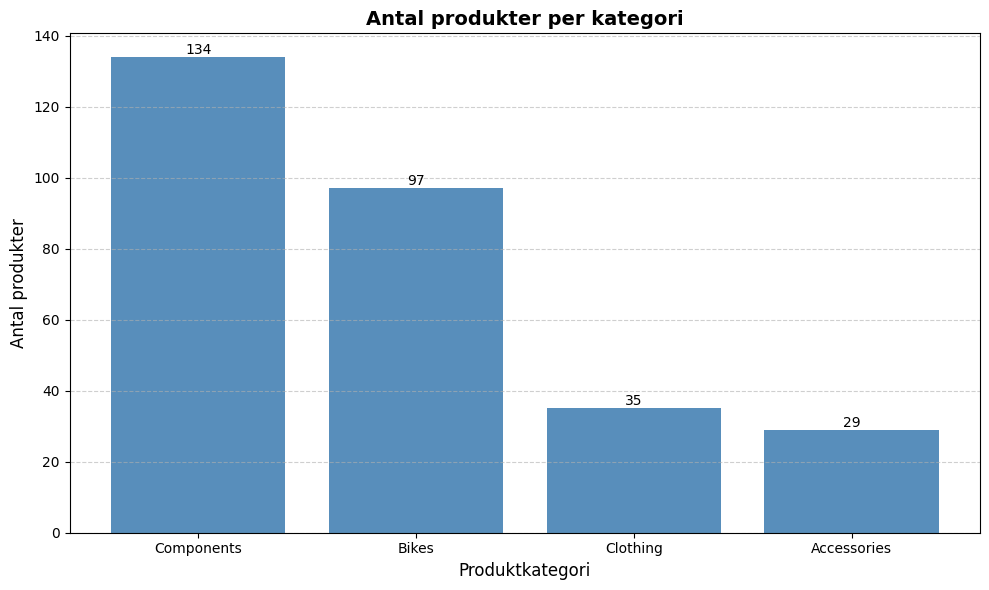

In [2]:
from src import viz as V

query_vis_1 = """
SELECT 
    pc.Name AS CategoryName,
    COUNT(DISTINCT p.ProductID) AS ProductCount
FROM Production.ProductCategory pc
JOIN Production.ProductSubcategory psc ON psc.ProductCategoryID = pc.ProductCategoryID
JOIN Production.Product p ON p.ProductSubcategoryID = psc.ProductSubcategoryID
GROUP BY pc.Name
ORDER BY ProductCount DESC
"""

df_vis1 = query_df(query_vis_1)

fig, ax = plt.subplots(figsize=(10, 6))

V.bar(
    ax,
    df_vis1,
    x_col="CategoryName",
    y_col="ProductCount",
    title="Antal produkter per kategori",
    xlabel="Produktkategori",
    ylabel="Antal produkter"
)

plt.tight_layout()
plt.show()


## Visualisering 1: Antal produkter per kategori
Hur många produkter finns i varje kategori?

Tabeller som används:
Production.ProductCategory
Production.ProductSubcategory
Production.Product

Plan:
JOINA tabellerna
Räkna DISTINCT produkter per kategori
Skapa vertikalt stapeldiagram
Analysera resultatet

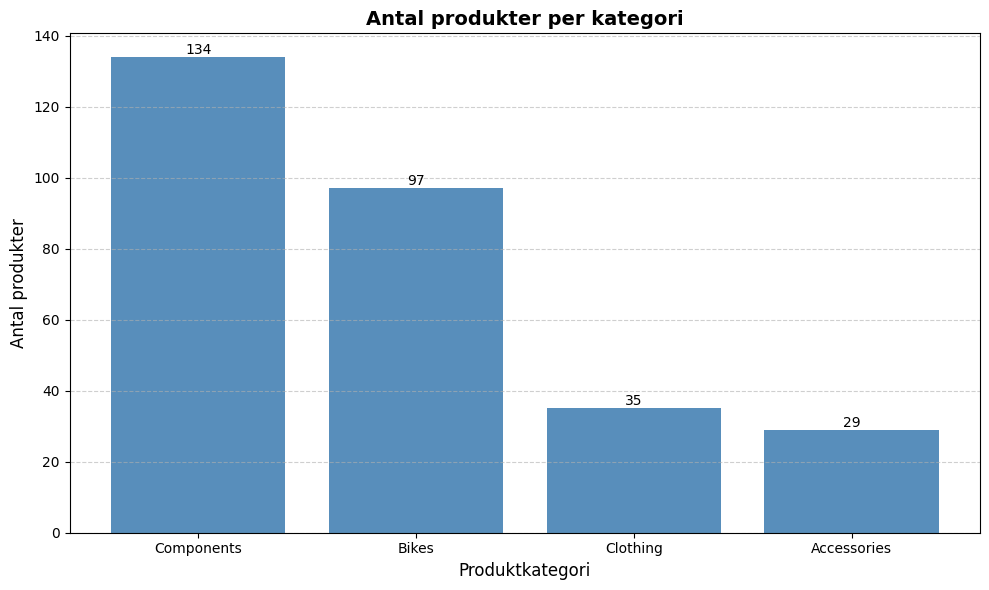

In [3]:
query_vis_1 = """
SELECT 
    pc.Name AS CategoryName,
    COUNT(DISTINCT p.ProductID) AS ProductCount
FROM Production.ProductCategory pc
JOIN Production.ProductSubcategory psc ON psc.ProductCategoryID = pc.ProductCategoryID
JOIN Production.Product p ON p.ProductSubcategoryID = psc.ProductSubcategoryID
GROUP BY pc.Name
ORDER BY ProductCount DESC
"""

df_vis1 = query_df(query_vis_1)



fig, ax = plt.subplots(figsize=(10,6))
# ax.set_axisbelow(True)
ax.grid(True, axis='y', linestyle='--', alpha=0.6)


bars = ax.bar(df_vis1['CategoryName'], df_vis1['ProductCount'], color='steelblue', alpha=0.9)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom"
    )



ax.set_xlabel("Produktkategori", fontsize=12)
ax.set_ylabel("Antal produkter", fontsize=12)
ax.set_title("Antal produkter per kategori", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

### Insikter - Antal produkter per kategori
Components är största kategorin med 134 produkter.
Accessories är minst med 29 produkter.

Detta indiketar på att företaget är starkt fokucerat på komponenter och reserdelar.
Och att accessories kan vara ett utvecklingsområde.

# Visualisering 2: Försäljning per produktkategori

Vilka produktkategorier genererar mest intäkter?

Använd tabeller: Production.ProductCategory, Production.ProductSubcategory, Production.Product, Sales.SalesOrderDetail

Plan: Joina tabellerna kör en order by DESC. Visulaisera med horisontell stapeldiagram

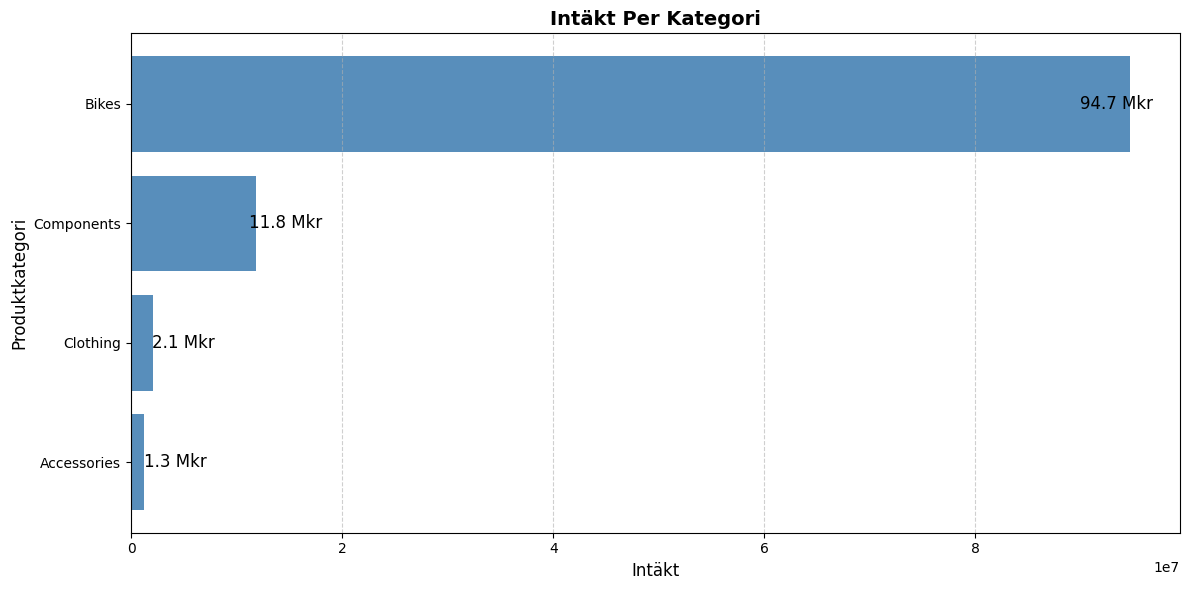

In [7]:

query_vis_2 = '''
SELECT
    ppc.ProductCategoryID,
    ppc.Name,
    SUM(ssod.LineTotal) AS IntäktPerKategori
FROM Production.ProductCategory ppc
INNER JOIN Production.ProductSubcategory ppsc
    ON ppsc.ProductCategoryID = ppc.ProductCategoryID
INNER JOIN Production.Product pp
    ON pp.ProductSubcategoryID = ppsc.ProductSubcategoryID
INNER JOIN sales.SalesOrderDetail ssod
    ON ssod.ProductID = pp.ProductID
GROUP BY
    ppc.ProductCategoryID,
    ppc.Name
ORDER BY IntäktPerKategori DESC
'''

df_vis2 = query_df(query_vis_2)


fig, ax = plt.subplots(figsize=(12, 6))

V.barh(
    ax,
    df_vis2,
    x_col="IntäktPerKategori",
    y_col="Name",
    title="Intäkt Per Kategori",
    xlabel="Intäkt",
    ylabel="Produktkategori"
)

ax.invert_yaxis()
plt.tight_layout()
plt.show()

### Insikter - Försäljninge per produktkategori
Bikes är största kategorin med försäljning på ca 94.7 Mkr.
Accessories är minst med försäljning på 1.3 Mkr.

Detta indiketar på att företaget är starkt fokucerat på Bikes.
Och att accessories kan vara ett utvecklingsområde.